# Generating Example Classification Data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
# %matplotlib inline


In [2]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)


In [ ]:
h = 1
sd1 = 1
sd2 = 1.5
n = 50
(x1, y1, x2, y2) = gen_data(n, h, sd1, sd2)


In [3]:
h = 1.5
sd1 = 1
sd2 = 1.5
n = 1000
(x1, y1, x2, y2) = gen_data(n, h, sd1, sd2)


In [4]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, 'o', ms=2)
    plt.plot(x2, y2, 'o', ms=2)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

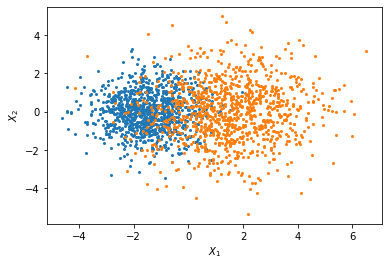

In [5]:
plot_data(x1, y1, x2, y2)

# Logistic Regression in Code

In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
clf = LogisticRegression()

In [20]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [21]:
y = np.hstack((np.repeat(1, n), np.repeat(2, n)))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, random_state=1)

In [23]:
X_train.shape

(1000, 2)

In [24]:
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
clf.score(X_test, y_test)

0.872

In [26]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))


array([[0.96376862, 0.03623138]])

In [27]:
clf.predict(np.array([-2, 0]).reshape(1, -1))


array([1])

# Computing Predictive Probabilities Across the Grid

In [35]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:, class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")


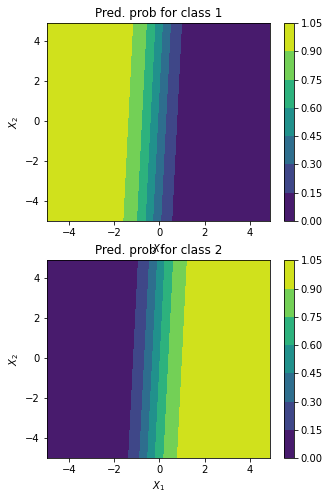

In [36]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");